In [8]:
!pip install seaborn

# Análisis Descriptivo de Datos para agronet_final.xlsx

En este notebook, realizaremos un análisis descriptivo de los datos de precios agrícolas. El objetivo es entender la distribución de los datos, identificar tendencias centrales y analizar la frecuencia de las categorías.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

## Carga de Datos

Cargamos el conjunto de datos limpio que fue preparado en el notebook anterior.

In [10]:
# Cargar los datos desde el archivo Excel
file_path = '../Data/agronet_final.xlsx'
df = pd.read_excel(file_path)

# Mostrar las primeras filas del DataFrame
df.head()

,Mercado,Precio,Fecha,Producto
0,Corabastos,2200.0,2005-07-15,Aguacate Papelillo
1,Corabastos,2340.0,2005-07-22,Aguacate Papelillo
2,Corabastos,2355.0,2005-07-29,Aguacate Papelillo
3,Corabastos,2410.0,2005-08-05,Aguacate Papelillo
4,Corabastos,2410.0,2005-08-12,Aguacate Papelillo


## Información General del DataFrame

Obtenemos una visión general de los datos, incluyendo los tipos de datos de cada columna y la cantidad de valores no nulos.

In [11]:
# Mostrar información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163931 entries, 0 to 163930
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Mercado   163931 non-null  object        
 1   Precio    163931 non-null  float64       
 2   Fecha     163931 non-null  datetime64[ns]
 3   Producto  163931 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.0+ MB


## Estadísticas Descriptivas

Calculamos las estadísticas descriptivas para todas las columnas. Esto incluye la media, desviación estándar, valores mínimos y máximos, y los cuartiles para las columnas numéricas, así como la frecuencia y valores únicos para las categóricas.

In [13]:
# Calcular estadísticas descriptivas para todas las columnas
df.describe(include='all')

,Mercado,Precio,Fecha,Producto
count,163931,163931.000000,163931,163931
unique,4,NaN,NaN,44
top,Corabastos,NaN,NaN,Pepino Cohombro
freq,53456,NaN,NaN,8996
mean,NaN,2112.957652,2013-06-12 15:25:13.229346560,NaN
min,NaN,44.000000,1997-01-30 00:00:00,NaN
25%,NaN,916.670000,2007-07-13 00:00:00,NaN
50%,NaN,1650.000000,2014-03-29 00:00:00,NaN
75%,NaN,2830.000000,2019-11-23 00:00:00,NaN
max,NaN,35000.000000,2025-05-17 00:00:00,NaN


## Análisis de Frecuencia de Variables Categóricas

Analizamos la frecuencia de las principales categorías en las columnas `Producto` y `Mercado` para entender cuáles son los productos y mercados más comunes en el conjunto de datos.

In [14]:
# Frecuencia de los 10 productos más comunes
top_10_productos = df['Producto'].value_counts().head(10)
print("Top 10 Productos más comunes:")
print(top_10_productos)

Top 10 Productos más comunes:
Producto
Pepino Cohombro            8996
Cebolla Cabezona Blanca    4900
Papa Criolla Limpia        4877
Banano Urabá               4873
Arveja Verde En Vaina      4846
Remolacha                  4827
Zanahoria                  4802
Arracacha Amarilla         4798
Perejil                    4794
Habichuela                 4792
Name: count, dtype: int64


In [15]:
# Frecuencia de los mercados
mercado_counts = df['Mercado'].value_counts()
print("\nFrecuencia de Mercados:")
print(mercado_counts)


Frecuencia de Mercados:
Mercado
Corabastos    53456
Tunja         48543
Duitama       32005
Sogamoso      29927
Name: count, dtype: int64


## Visualización de la Distribución de Precios

Generamos un histograma para visualizar cómo se distribuyen los precios. Esto nos ayuda a identificar la forma de la distribución y posibles valores atípicos.

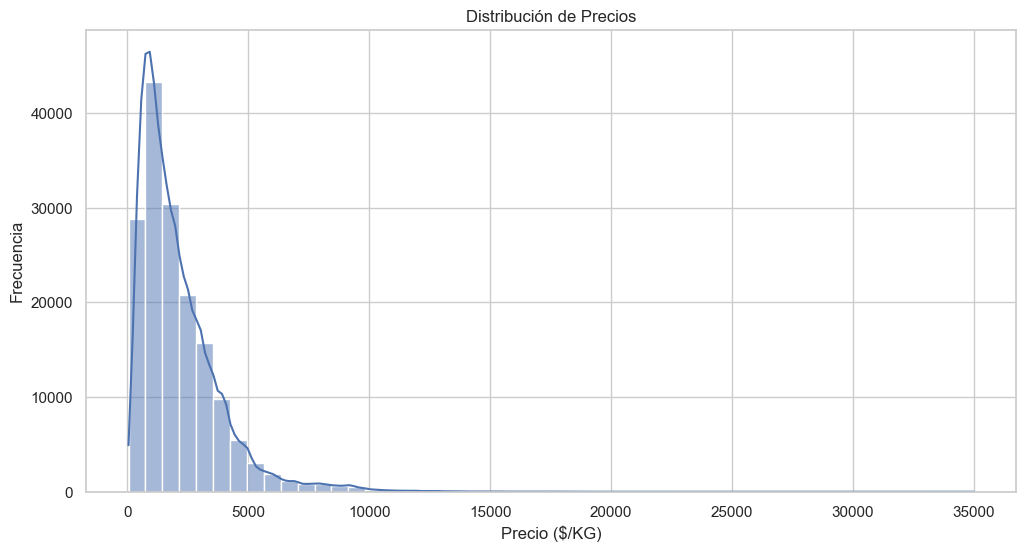

In [16]:
# Histograma de la columna 'Precio'
plt.figure(figsize=(12, 6))
sns.histplot(df['Precio'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio ($/KG)')
plt.ylabel('Frecuencia')
plt.show()

Código para el Mapa de Relaciones


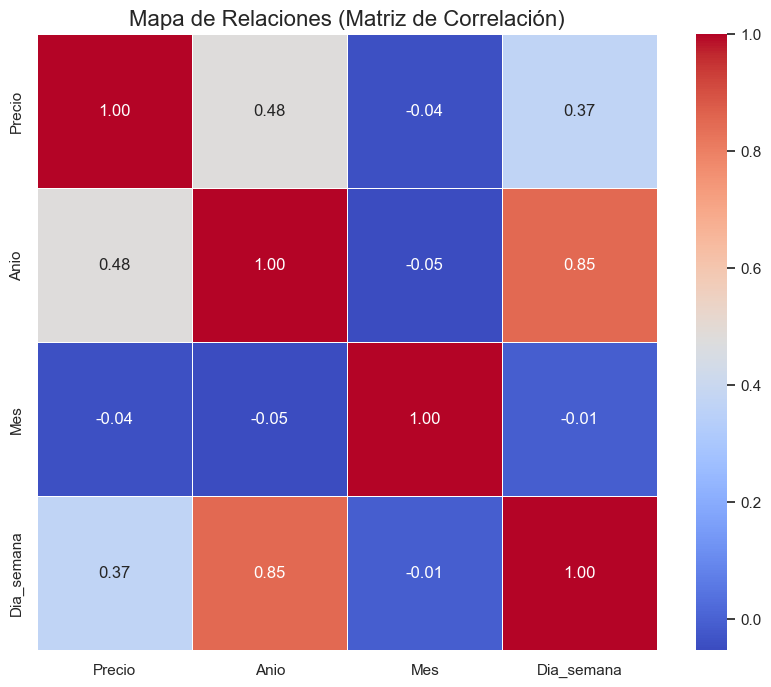

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el conjunto de datos final
# Asegúrate de que la ruta al archivo sea la correcta.
file_path = '../Data/agronet_final.xlsx'
df = pd.read_excel(file_path, parse_dates=['Fecha'])

# 2. Ingeniería de Características a partir de la Fecha
# Extraemos componentes de la fecha que pueden ser relevantes.
df['Anio'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Dia_semana'] = df['Fecha'].dt.dayofweek # Lunes=0, Domingo=6

# 3. Selección de Variables para el Análisis
# Nos enfocaremos en las variables numéricas y de tiempo para la correlación.
# Para incluir 'Mercado' y 'Producto', necesitaríamos convertirlas a números (codificación).
# Empecemos con las variables más directas.
variables_para_correlacion = df[['Precio', 'Anio', 'Mes', 'Dia_semana']]

# 4. Calcular la Matriz de Correlación
correlation_matrix = variables_para_correlacion.corr()

# 5. Visualizar el Mapa de Calor de Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Relaciones (Matriz de Correlación)', fontsize=16)
plt.show()

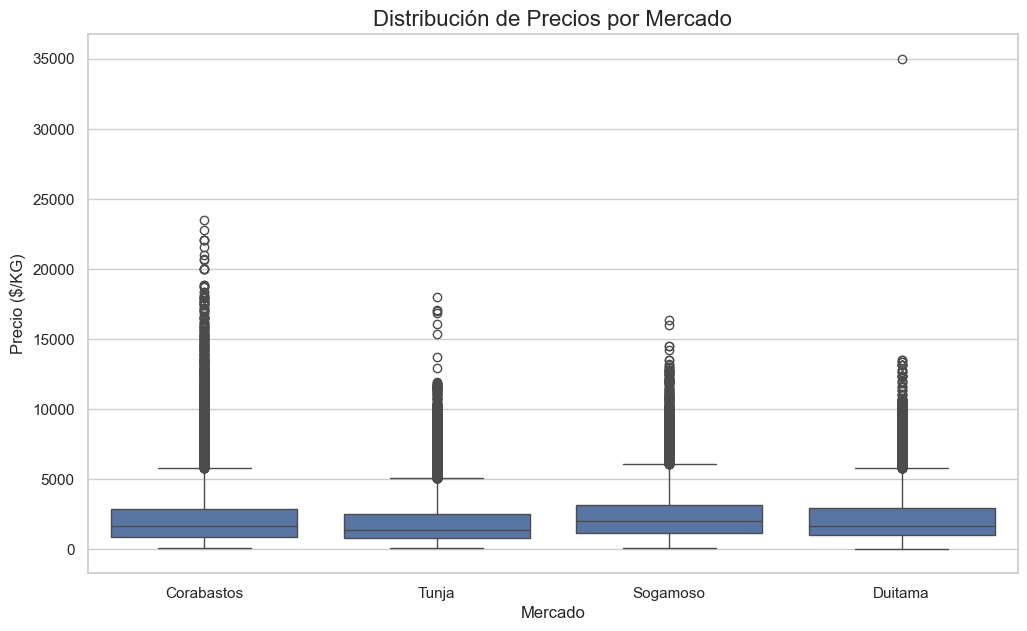

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.boxplot(x='Mercado', y='Precio', data=df)
plt.title('Distribución de Precios por Mercado', fontsize=16)
plt.xlabel('Mercado')
plt.ylabel('Precio ($/KG)')
plt.show()

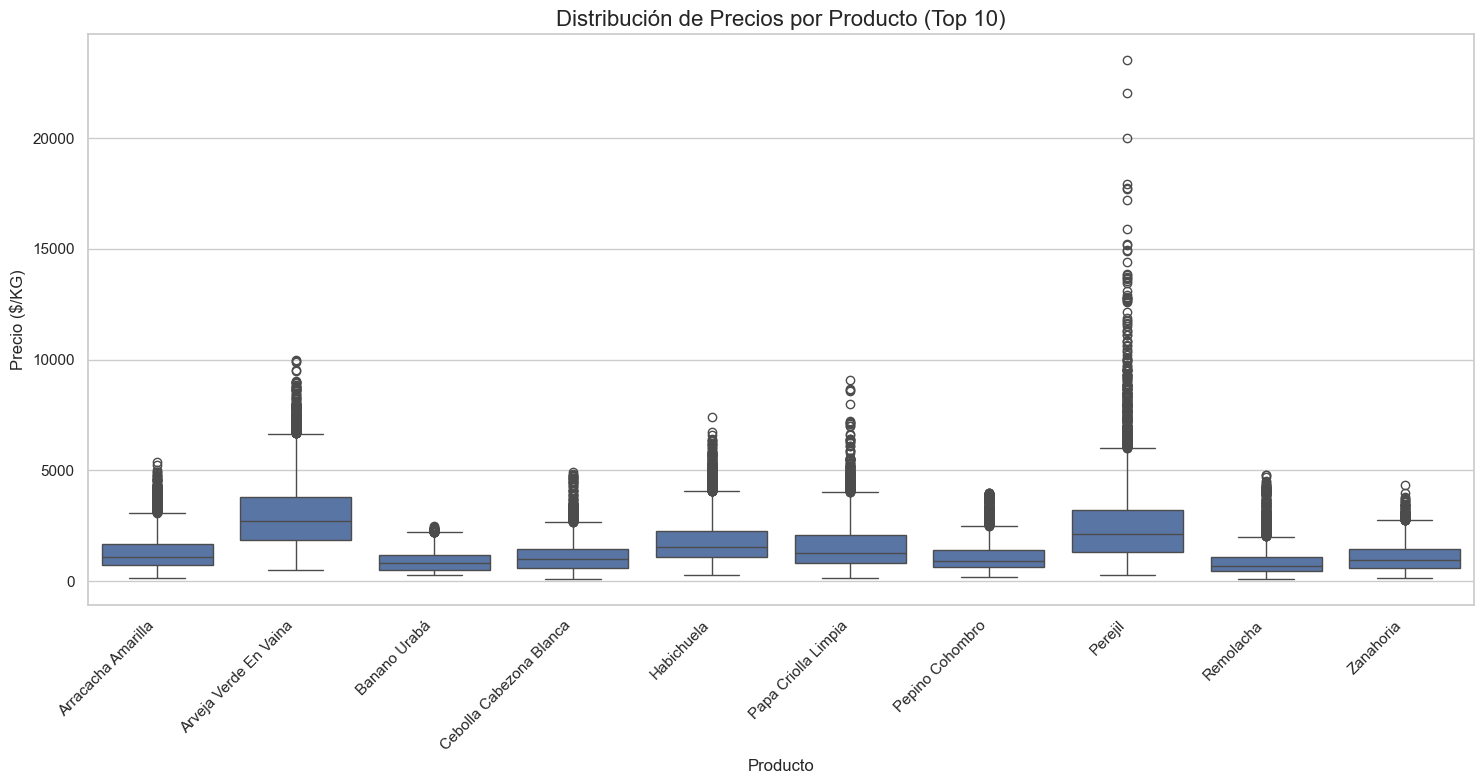

In [19]:
# Encontrar los 10 productos más comunes
top_10_productos = df['Producto'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo esos productos
df_top_productos = df[df['Producto'].isin(top_10_productos)]

# Crear el gráfico de cajas
plt.figure(figsize=(15, 8))
sns.boxplot(x='Producto', y='Precio', data=df_top_productos)
plt.title('Distribución de Precios por Producto (Top 10)', fontsize=16)
plt.xlabel('Producto')
plt.ylabel('Precio ($/KG)')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas para que no se solapen
plt.tight_layout() # Ajustar el gráfico para que todo sea visible
plt.show()